# Gemini Pro with LangChain on Google AI Studio

In [ ]:
!pip -q install langchain_experimental langchain_core
!pip -q install google-generativeai==0.3.1
!pip -q install google-ai-generativelanguage==0.4.0
!pip -q install langchain-google-genai
!pip -q install "langchain[docarray]"



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 12.2 MB/s eta 0:00:00


In [ ]:
!pip show langchain langchain-core

Name: langchain
Version: 0.2.6
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-community
---
Name: langchain-core
Version: 0.2.10
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: jsonpatch, langsmith, packaging, pydantic, PyYAML, tenacity
Required-by: langchain, langchain-community, langchain-experimental, langchain-google-genai, langchain-text-splitters


In [ ]:
#@title Setting up the Auth
import os
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [ ]:
models = [m for m in genai.list_models()]
models

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
       display_name='Embedding Gecko',
       description='Obtai

In [ ]:
# generate text
prompt = 'Who are you and what can you do?'

model = genai.GenerativeModel('gemini-pro')

response = model.generate_content(prompt)

Markdown(response.text)

I am Gemini, a large multi-modal model, trained by Google. I am designed to provide information and answer questions to the best of my abilities. However, I am still under development and may not always be able to provide the most accurate or comprehensive information.

Here are some things I can do:

* Answer your questions on a wide range of topics, including science, history, current events, and more.
* Provide summaries of factual topics in a concise and easy-to-understand way.
* Translate languages.
* Write different kinds of creative content, such as poems, stories, and songs.
* Offer suggestions on various topics, like travel destinations, recipes, and gift ideas.
* Solve puzzles and riddles.
* Play games like trivia and word association.

Is there anything I can help you with today?

# Google's Gemini with LangChain


## Basic LLM Chain


In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI


llm = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)


result = llm.invoke("What is a LLM?")

Markdown(result.content)


**LLM** stands for **Large Language Model**.

**Definition:**

LLMs are advanced artificial intelligence (AI) models trained on massive datasets of text and code. They are designed to understand and generate human-like language, process complex information, and perform various language-related tasks.

**Characteristics:**

* **Massive Size:** Trained on billions or even trillions of parameters.
* **Contextual Understanding:** Can comprehend the context of text and generate responses that are relevant and coherent.
* **Natural Language Generation:** Can create human-readable text, including articles, stories, poems, and code.
* **Language Translation:** Can translate text between multiple languages.
* **Question Answering:** Can provide answers to questions based on their training data.
* **Summarization:** Can condense large amounts of text into concise summaries.
* **Chatbot:** Can engage in natural language conversations.

**Examples:**

* **GPT-3 (Generative Pre-trained Transformer 3):** Developed by OpenAI.
* **BLOOM:** Developed by Google AI.
* **Jurassic-1:** Developed by AI21 Labs.
* **Megatron-Turing NLG:** Developed by Microsoft and NVIDIA.

**Applications:**

LLMs have a wide range of applications, including:

* Natural language processing
* Machine translation
* Content generation
* Chatbots and virtual assistants
* Search engines
* Summarization and abstraction
* Language modeling and prediction

In [ ]:
for chunk in llm.stream("Write a haiku about LLMs."):
    print(chunk.content)
    print("---")

Words flow like rivers
AI's thoughts, boundless and vast
Language'
---
s new dawn
---


## Basic Multi Chain

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser


model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)

In [ ]:
prompt = ChatPromptTemplate.from_template(
    "tell me a short joke about {topic}"
)

output_parser = StrOutputParser()

In [ ]:
chain = prompt | model | output_parser

In [ ]:
chain.invoke({"topic": "machine learning"})

'Why did the machine learning algorithm cross the road?\n\nTo get to the other data set.'

## More Complicated Chain - Mini RAG

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)

In [ ]:
!pip install docarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.2/270.2 kB 4.4 MB/s eta 0:00:00


In [ ]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

vectorstore = DocArrayInMemorySearch.from_texts(
    # mini docs for embedding
    ["Gemini Pro is a Large Language Model was made by GoogleDeepMind",
     "Gemini can be either a star sign or a name of a series of language models",
     "A Language model is trained by predicting the next token",
     "LLMs can easily do a variety of NLP tasks as well as text generation"],

    embedding=embeddings # passing in the embedder model
)

retriever = vectorstore.as_retriever()

/usr/local/lib/python3.10/dist-packages/pydantic/_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


In [ ]:
retriever.get_relevant_documents("what is Gemini?")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


[Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation'),
 Document(page_content='A Language model is trained by predicting the next token')]

In [ ]:
retriever.get_relevant_documents("what is gemini pro?")

[Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='A Language model is trained by predicting the next token'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation')]

In [ ]:
template = """Answer the question a a full sentence, based only on the following context:
{context}

Return you answer in three back ticks

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

In [ ]:
from langchain.schema.runnable import RunnableMap

In [ ]:
retriever.get_relevant_documents("Who made Gemini Pro?")

[Document(page_content='Gemini Pro is a Large Language Model was made by GoogleDeepMind'),
 Document(page_content='Gemini can be either a star sign or a name of a series of language models'),
 Document(page_content='LLMs can easily do a variety of NLP tasks as well as text generation'),
 Document(page_content='A Language model is trained by predicting the next token')]

In [ ]:
chain = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
}) | prompt | model | output_parser

In [ ]:
chain.invoke({"question": "Who made Gemini Pro?"})

'```\nGemini Pro is a Large Language Model made by GoogleDeepMind.\n```'

## PAL Chain

In [ ]:
from langchain_experimental.pal_chain import PALChain

from langchain.chains.llm import LLMChain

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0)

In [ ]:
pal_chain = PALChain.from_math_prompt(model, verbose=True, allow_dangerous_code=True)

In [ ]:
question = "The cafeteria had 23 apples. \
If they used 20 for lunch and bought 6 more,\
how many apples do they have?"

In [ ]:
pal_chain.invoke(question)



> Entering new PALChain chain...


def solution():
    """The cafeteria had 23 apples. If they used 20 for lunch and bought 6 more,how many apples do they have?"""
    apples_initial = 23
    apples_used = 20
    apples_bought = 6
    apples_left = apples_initial - apples_used + apples_bought
    result = apples_left
    return result

> Finished chain.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


{'question': 'The cafeteria had 23 apples. If they used 20 for lunch and bought 6 more,how many apples do they have?',
 'result': '9'}

In [ ]:
question = "If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready \
 and walk to school, at what time will you get to school?"

pal_chain.invoke(question)



> Entering new PALChain chain...
def solution():
    """If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready  and walk to school, at what time will you get to school?"""
    wake_up_time = 7
    hours_to_get_ready = 1
    minutes_to_get_ready = 30
    total_minutes_to_get_ready = hours_to_get_ready * 60 + minutes_to_get_ready
    arrival_time = wake_up_time + total_minutes_to_get_ready / 60
    result = arrival_time
    return result


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



> Finished chain.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


{'question': 'If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready  and walk to school, at what time will you get to school?',
 'result': '8.5'}

## Multi Modal

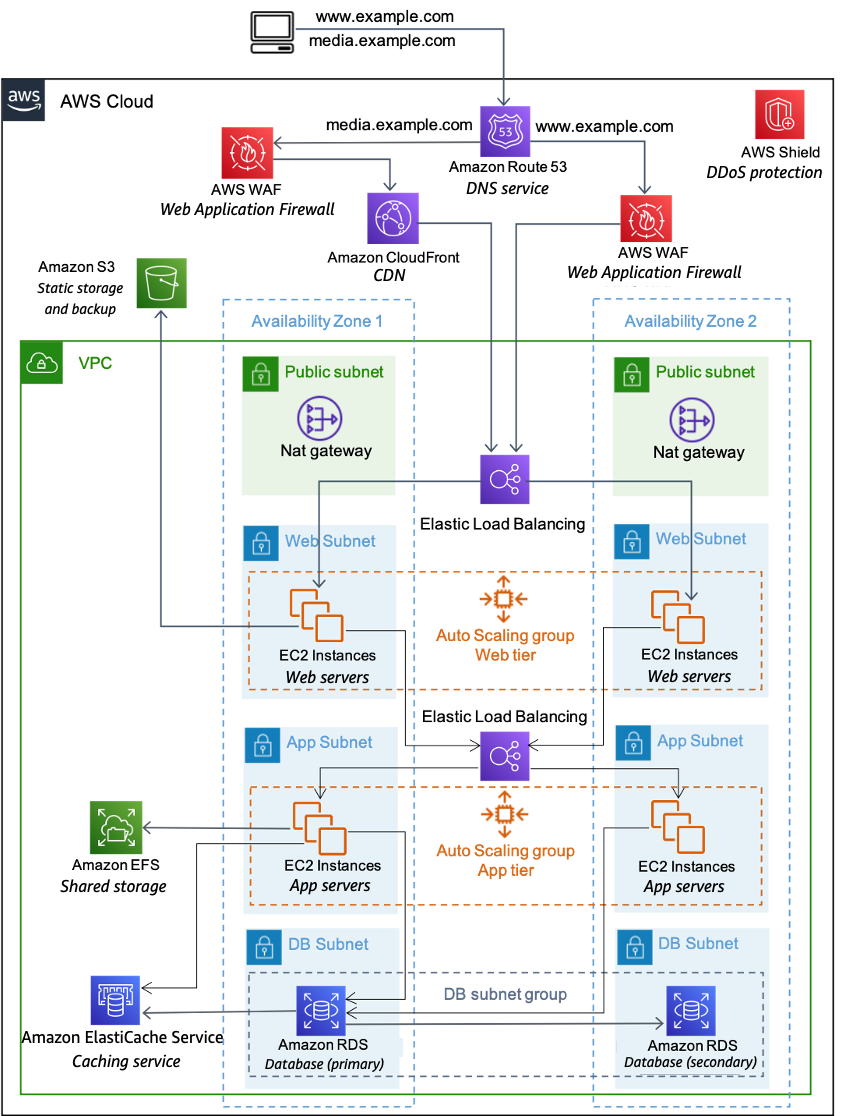

In [ ]:
import requests
from IPython.display import Image

image_url = "https://docs.aws.amazon.com/images/whitepapers/latest/web-application-hosting-best-practices/images/image4.png"
content = requests.get(image_url).content
Image(content)

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": "https://docs.aws.amazon.com/images/whitepapers/latest/web-application-hosting-best-practices/images/image4.png"},
    ]
)
llm.invoke([message])

AIMessage(content='This image is a diagram of an AWS architecture. It shows a web application deployed on AWS, with the following components:\n\n- **AWS Cloud:** The overall AWS environment.\n- **AWS Shield:** Provides DDoS protection for the application.\n- **Amazon Route 53:** Used for DNS service and routing traffic to the application.\n- **Amazon CloudFront:** A content delivery network (CDN) that caches content closer to users, improving performance.\n- **AWS WAF:** A web application firewall that protects the application from malicious traffic.\n- **Amazon S3:** Used for static storage of application assets.\n- **Amazon EFS:** A shared file system used for persistent storage.\n- **Amazon ElastiCache:** A caching service that improves application performance.\n- **Amazon RDS:** A database service that stores application data.\n- **VPC:** A virtual private cloud that provides a secure network environment for the application.\n- **Availability Zones:** Two availability zones are use